In [2]:
#import the required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [3]:
#import the dataset
#latin-1 encoding maps all possible byte values to the first 256 Unicode code points
cars = pd.read_csv("/content/ToyotaCorolla.csv",encoding='latin1')

In [4]:
cars

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [5]:
cars.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [6]:
cars.tail()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0
1435,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950,76,5,1998,1,Petrol,110,0,...,0,0,1,0,0,0,0,0,0,0


In [7]:
cars.mean()

<ipython-input-7-9bac2de8474d>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cars.mean()


Id                    721.555014
Price               10730.824513
Age_08_04              55.947075
Mfg_Month               5.548747
Mfg_Year             1999.625348
KM                  68533.259749
HP                    101.502089
Met_Color               0.674791
Automatic               0.055710
cc                   1576.855850
Doors                   4.033426
Cylinders               4.000000
Gears                   5.026462
Quarterly_Tax          87.122563
Weight               1072.459610
Mfr_Guarantee           0.409471
BOVAG_Guarantee         0.895543
Guarantee_Period        3.815460
ABS                     0.813370
Airbag_1                0.970752
Airbag_2                0.722841
Airco                   0.508357
Automatic_airco         0.056407
Boardcomputer           0.294568
CD_Player               0.218663
Central_Lock            0.580084
Powered_Windows         0.561978
Power_Steering          0.977716
Radio                   0.146240
Mistlamps               0.256964
Sport_Mode

In [8]:
cars.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [9]:
cars.dtypes

Id                   int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
T

In [10]:
cars.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
cars.std()

<ipython-input-11-2f69368c0db2>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cars.std()


Id                    416.476890
Price                3626.964585
Age_08_04              18.599988
Mfg_Month               3.354085
Mfg_Year                1.540722
KM                  37506.448872
HP                     14.981080
Met_Color               0.468616
Automatic               0.229441
cc                    424.386770
Doors                   0.952677
Cylinders               0.000000
Gears                   0.188510
Quarterly_Tax          41.128611
Weight                 52.641120
Mfr_Guarantee           0.491907
BOVAG_Guarantee         0.305959
Guarantee_Period        3.011025
ABS                     0.389750
Airbag_1                0.168559
Airbag_2                0.447751
Airco                   0.500104
Automatic_airco         0.230786
Boardcomputer           0.456007
CD_Player               0.413483
Central_Lock            0.493717
Powered_Windows         0.496317
Power_Steering          0.147657
Radio                   0.353469
Mistlamps               0.437111
Sport_Mode

In [12]:
cars.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [13]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [14]:
cars.std()

<ipython-input-14-2f69368c0db2>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cars.std()


Id                    416.476890
Price                3626.964585
Age_08_04              18.599988
Mfg_Month               3.354085
Mfg_Year                1.540722
KM                  37506.448872
HP                     14.981080
Met_Color               0.468616
Automatic               0.229441
cc                    424.386770
Doors                   0.952677
Cylinders               0.000000
Gears                   0.188510
Quarterly_Tax          41.128611
Weight                 52.641120
Mfr_Guarantee           0.491907
BOVAG_Guarantee         0.305959
Guarantee_Period        3.011025
ABS                     0.389750
Airbag_1                0.168559
Airbag_2                0.447751
Airco                   0.500104
Automatic_airco         0.230786
Boardcomputer           0.456007
CD_Player               0.413483
Central_Lock            0.493717
Powered_Windows         0.496317
Power_Steering          0.147657
Radio                   0.353469
Mistlamps               0.437111
Sport_Mode

In [15]:
cars.max()

Id                                                           1442
Model                TOYOTA Corolla VERSO 2.0 D4D SOL (7) BNS MPV
Price                                                       32500
Age_08_04                                                      80
Mfg_Month                                                      12
Mfg_Year                                                     2004
KM                                                         243000
Fuel_Type                                                  Petrol
HP                                                            192
Met_Color                                                       1
Color                                                      Yellow
Automatic                                                       1
cc                                                          16000
Doors                                                           5
Cylinders                                                       4
Gears     

In [16]:
cars.min()

Id                                1
Model               TOYOTA Corolla 
Price                          4350
Age_08_04                         1
Mfg_Month                         1
Mfg_Year                       1998
KM                                1
Fuel_Type                       CNG
HP                               69
Met_Color                         0
Color                         Beige
Automatic                         0
cc                             1300
Doors                             2
Cylinders                         4
Gears                             3
Quarterly_Tax                    19
Weight                         1000
Mfr_Guarantee                     0
BOVAG_Guarantee                   0
Guarantee_Period                  3
ABS                               0
Airbag_1                          0
Airbag_2                          0
Airco                             0
Automatic_airco                   0
Boardcomputer                     0
CD_Player                   

In [17]:
cars_1 = cars.rename({'Age_08_04':'Age','Quarterly_Tax':'QT'},axis=1)

In [18]:
cars_1

,Id,Model,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [19]:
cars_2=cars_1.drop("Mfg_Year",axis=1)

In [20]:
cars_3=cars_2.drop("Model",axis=1)

In [21]:
cars_3

,Id,Price,Age,Mfg_Month,KM,Fuel_Type,HP,Met_Color,Color,Automatic,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,13500,23,10,46986,Diesel,90,1,Blue,0,...,1,1,1,0,0,0,1,0,0,0
1,2,13750,23,10,72937,Diesel,90,1,Silver,0,...,1,0,1,0,0,0,1,0,0,0
2,3,13950,24,9,41711,Diesel,90,1,Blue,0,...,0,0,1,0,0,0,1,0,0,0
3,4,14950,26,7,48000,Diesel,90,0,Black,0,...,0,0,1,0,0,0,1,0,0,0
4,5,13750,30,3,38500,Diesel,90,0,Black,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,7500,69,12,20544,Petrol,86,1,Blue,0,...,1,1,1,0,1,1,1,0,0,0
1432,1439,10845,72,9,19000,Petrol,86,0,Grey,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,8500,71,10,17016,Petrol,86,0,Blue,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,7250,70,11,16916,Petrol,86,1,Grey,0,...,0,0,0,0,0,0,1,0,0,0


In [22]:
cars_4=cars_3.drop_duplicates().reset_index(drop=True)

In [23]:
cars_4

,Id,Price,Age,Mfg_Month,KM,Fuel_Type,HP,Met_Color,Color,Automatic,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,13500,23,10,46986,Diesel,90,1,Blue,0,...,1,1,1,0,0,0,1,0,0,0
1,2,13750,23,10,72937,Diesel,90,1,Silver,0,...,1,0,1,0,0,0,1,0,0,0
2,3,13950,24,9,41711,Diesel,90,1,Blue,0,...,0,0,1,0,0,0,1,0,0,0
3,4,14950,26,7,48000,Diesel,90,0,Black,0,...,0,0,1,0,0,0,1,0,0,0
4,5,13750,30,3,38500,Diesel,90,0,Black,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,7500,69,12,20544,Petrol,86,1,Blue,0,...,1,1,1,0,1,1,1,0,0,0
1432,1439,10845,72,9,19000,Petrol,86,0,Grey,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,8500,71,10,17016,Petrol,86,0,Blue,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,7250,70,11,16916,Petrol,86,1,Grey,0,...,0,0,0,0,0,0,1,0,0,0


In [24]:
cars_4.corr()

<ipython-input-24-39f2ea670843>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cars_4.corr()


,Id,Price,Age,Mfg_Month,KM,HP,Met_Color,Automatic,cc,Doors,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,1.000000,-0.738250,0.906132,0.043742,0.273298,-0.109375,-0.079713,0.066265,-0.117704,-0.130207,...,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,0.159171
Price,-0.738250,1.000000,-0.876590,-0.018138,-0.569960,0.314990,0.108905,0.033081,0.126389,0.185326,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age,0.906132,-0.876590,1.000000,-0.123255,0.505672,-0.156622,-0.108150,0.031717,-0.098084,-0.148359,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.020630,-0.039312,0.030266,0.009146,0.037387,-0.012069,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
KM,0.273298,-0.569960,0.505672,-0.020630,1.000000,-0.333538,-0.080503,-0.081854,0.102683,-0.036197,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,-0.109375,0.314990,-0.156622,-0.039312,-0.333538,1.000000,0.058712,0.013144,0.035856,0.092424,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,-0.079713,0.108905,-0.108150,0.030266,-0.080503,0.058712,1.000000,-0.019335,0.031812,0.085243,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.066265,0.033081,0.031717,0.009146,-0.081854,0.013144,-0.019335,1.000000,0.066740,-0.027654,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,-0.117704,0.126389,-0.098084,0.037387,0.102683,0.035856,0.031812,0.066740,1.000000,0.079903,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725
Doors,-0.130207,0.185326,-0.148359,-0.012069,-0.036197,0.092424,0.085243,-0.027654,0.079903,1.000000,...,0.132092,0.107626,0.059792,-0.008318,0.064705,-0.129881,-0.022542,-0.039555,-0.008265,0.102292


In [25]:
import statsmodels.formula.api as smf
model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight',data=cars_4).fit()

In [26]:
model.params

Intercept   -5573.106358
Age          -121.658402
KM             -0.020817
HP             31.680906
cc             -0.121100
Doors          -1.616641
Gears         594.319936
QT              3.949081
Weight         16.958632
dtype: float64

In [27]:
print(model.tvalues, '\n', np.round(model.pvalues,5))

Intercept    -3.948666
Age         -46.511852
KM          -16.621622
HP           11.241018
cc           -1.344222
Doors        -0.040410
Gears         3.016007
QT            3.014535
Weight       15.879803
dtype: float64 
 Intercept    0.00008
Age          0.00000
KM           0.00000
HP           0.00000
cc           0.17909
Doors        0.96777
Gears        0.00261
QT           0.00262
Weight       0.00000
dtype: float64


In [28]:
(model.rsquared,model.rsquared_adj)

(0.8637627463428191, 0.8629989775766962)

In [29]:
ml_cc=smf.ols('Price~cc',data = cars_4).fit()
print(ml_cc.tvalues, '\n', ml_cc.pvalues)

Intercept    24.694090
cc            4.824822
dtype: float64 
 Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


In [30]:
ml_doors=smf.ols('Price~Doors',data = cars_4).fit()
print(ml_doors.tvalues, '\n', ml_doors.pvalues)

Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [31]:
rsq_age=smf.ols('Age~KM+HP+cc+Doors+Gears+QT+Weight',data=cars_4).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+cc+Doors+Gears+QT+Weight',data=cars_4).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+cc+Doors+Gears+QT+Weight',data=cars_4).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('cc~Age+KM+HP+Doors+Gears+QT+Weight',data=cars_4).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+cc+Gears+QT+Weight',data=cars_4).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+cc+Doors+QT+Weight',data=cars_4).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('QT~Age+KM+HP+cc+Doors+Gears+Weight',data=cars_4).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+cc+Doors+Gears+QT',data=cars_4).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Putting the values in Dataframe format
d1={'Variables':['Age','KM','HP','cc','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,QT,2.311431
7,Weight,2.516420


In [32]:
import statsmodels.api as sm

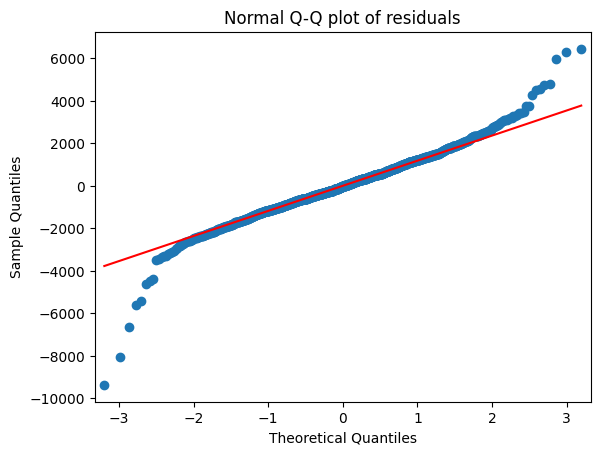

In [33]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [34]:
list(np.where(model.resid>6000))

[array([147, 523])]

In [35]:
list(np.where(model.resid<-6000))

[array([221, 601, 960])]

In [36]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

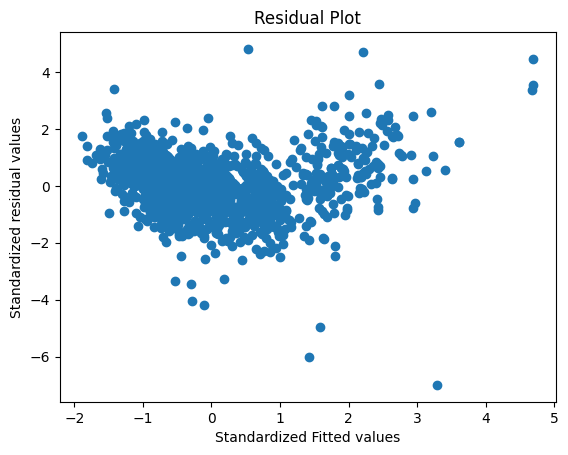

In [37]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [38]:
cars_4.head(1)

,Id,Price,Age,Mfg_Month,KM,Fuel_Type,HP,Met_Color,Color,Automatic,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,13500,23,10,46986,Diesel,90,1,Blue,0,...,1,1,1,0,0,0,1,0,0,0


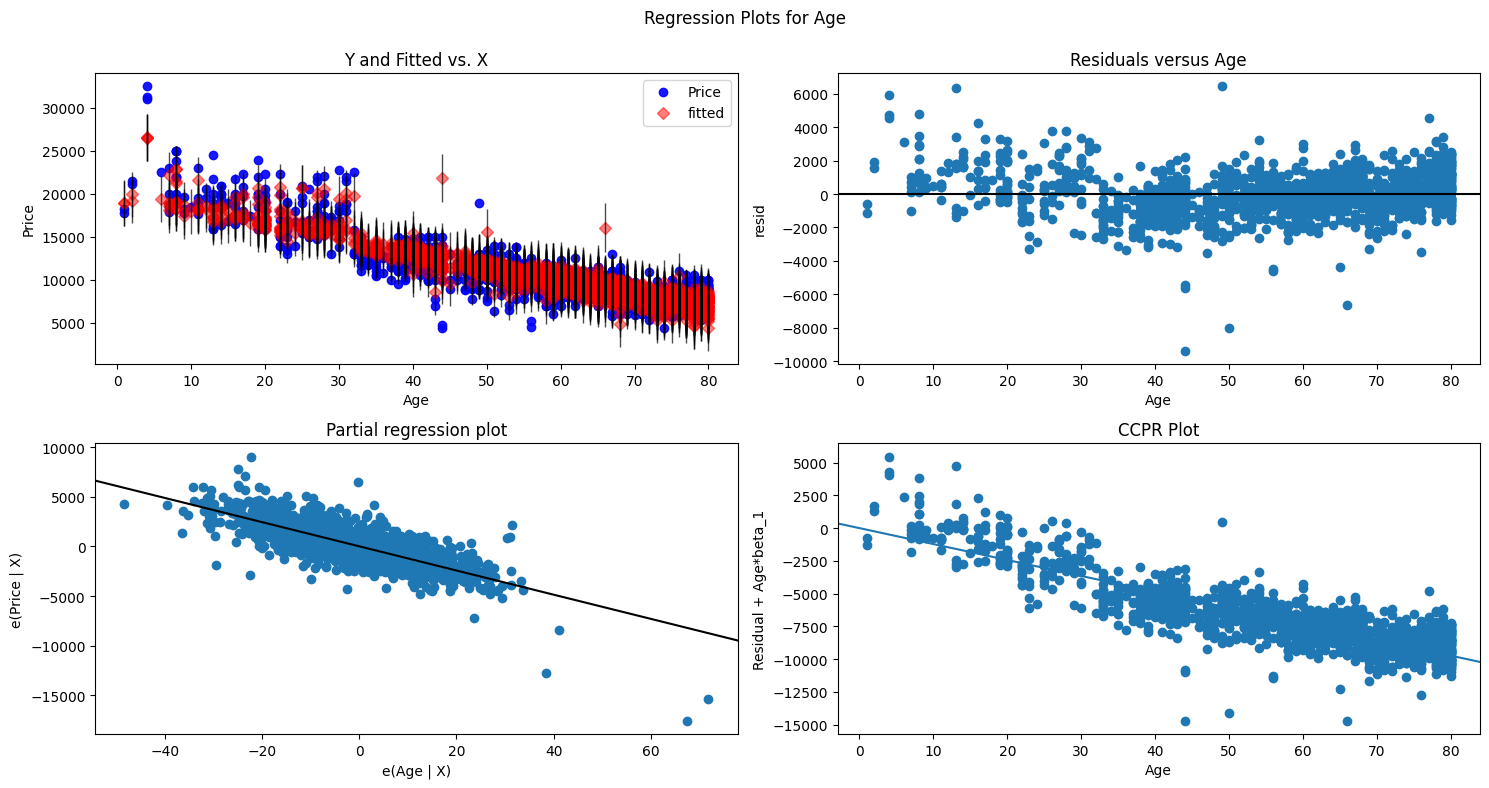

In [39]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

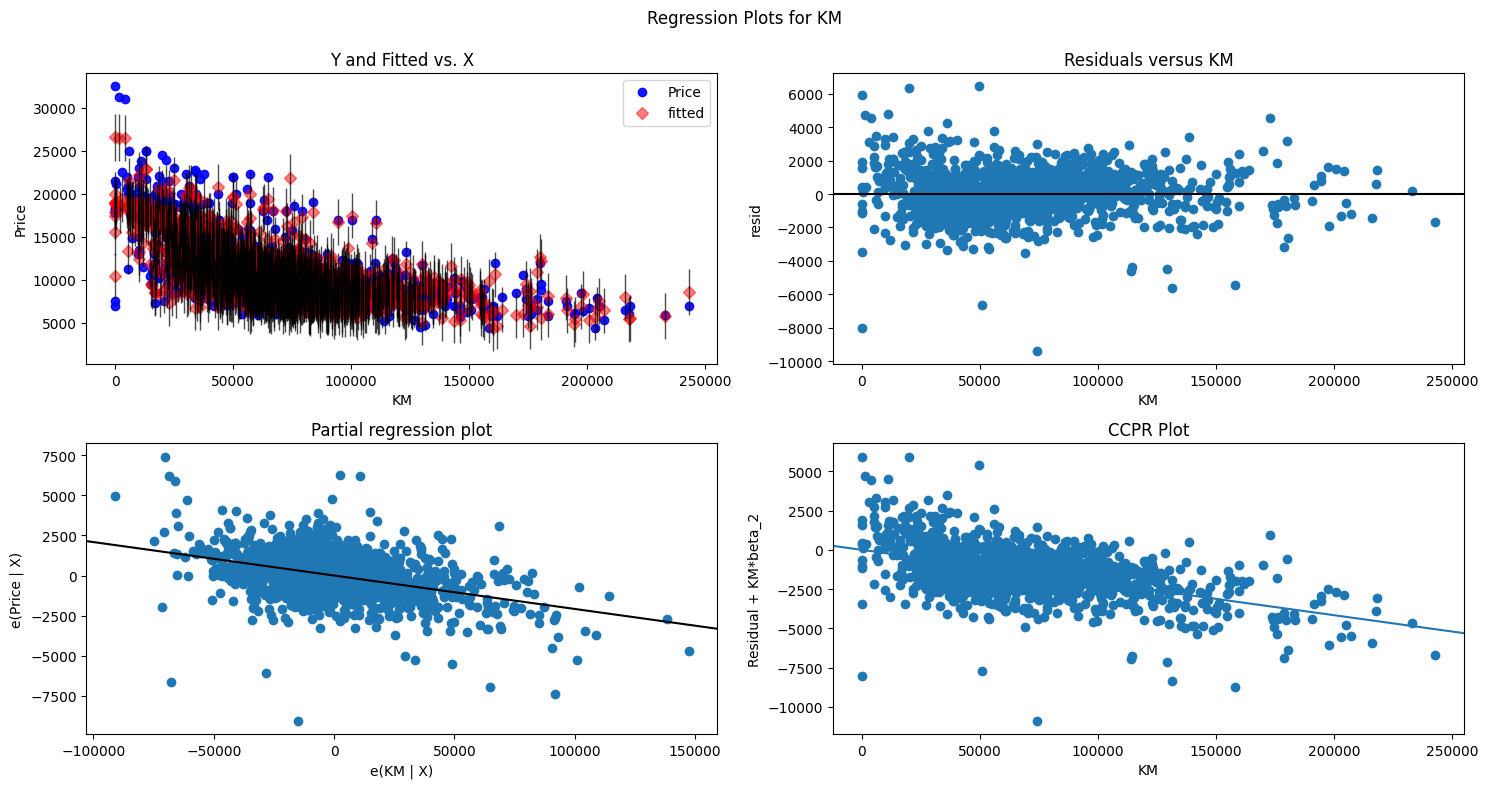

In [40]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

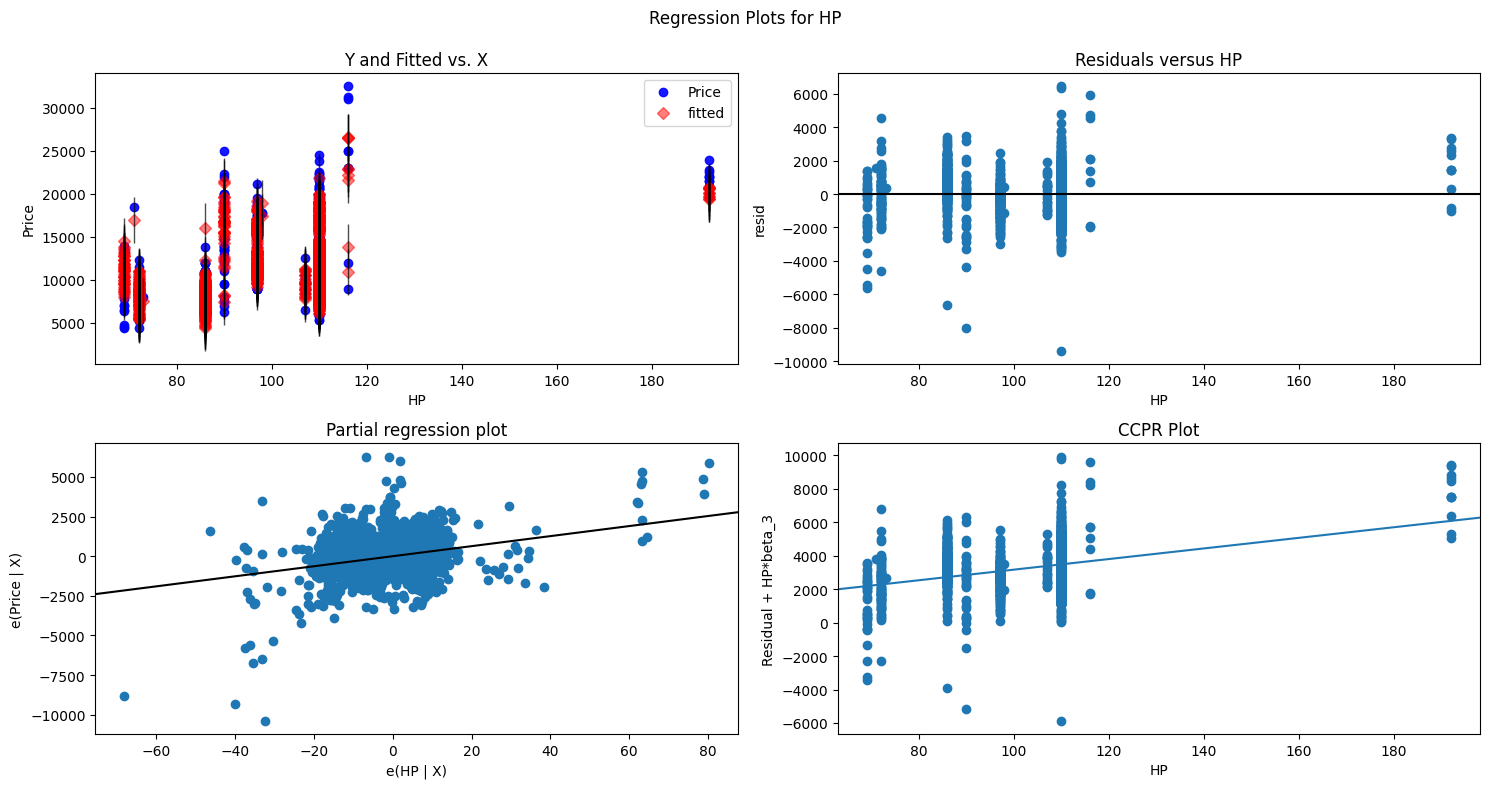

In [41]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

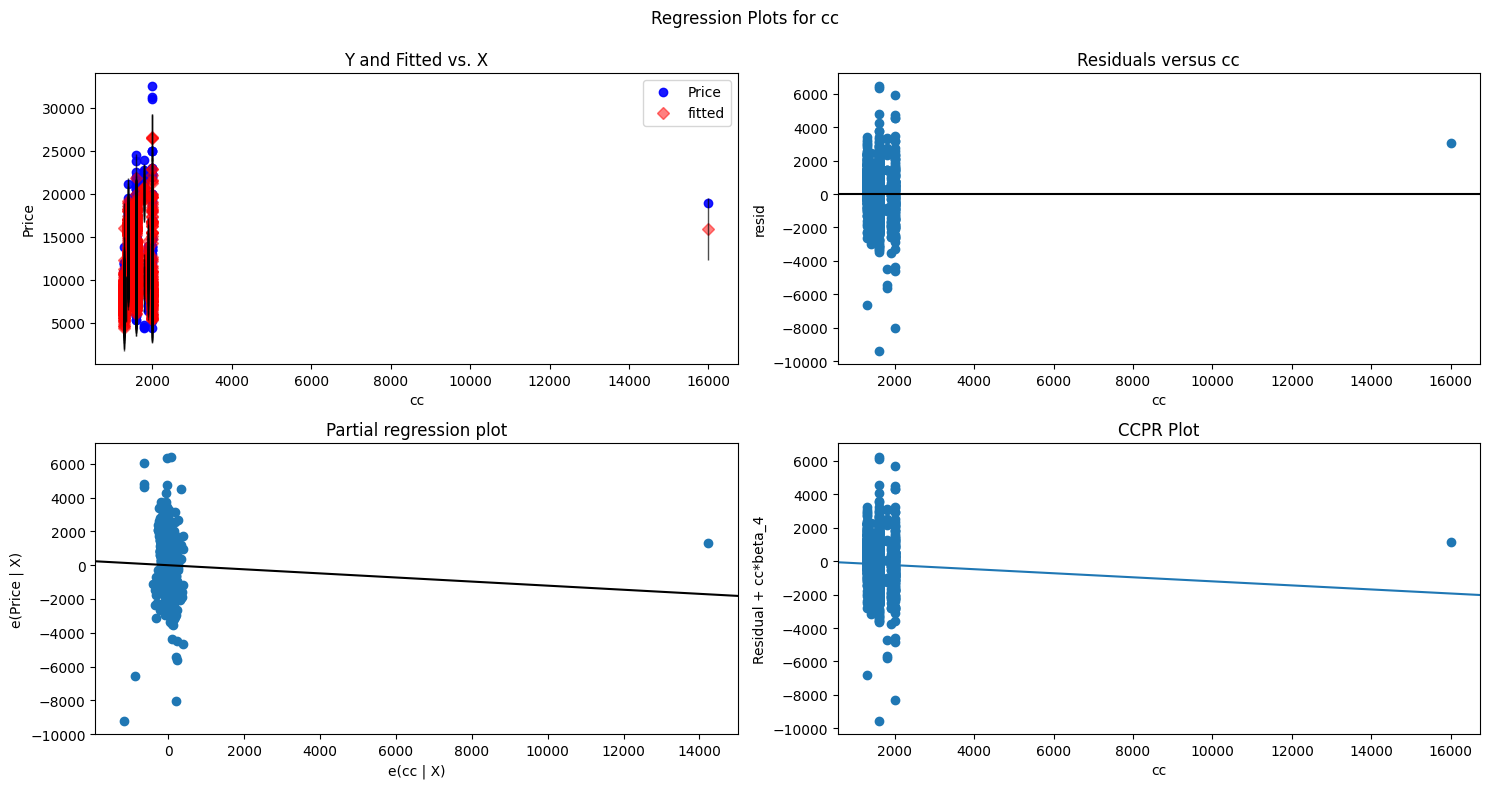

In [42]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

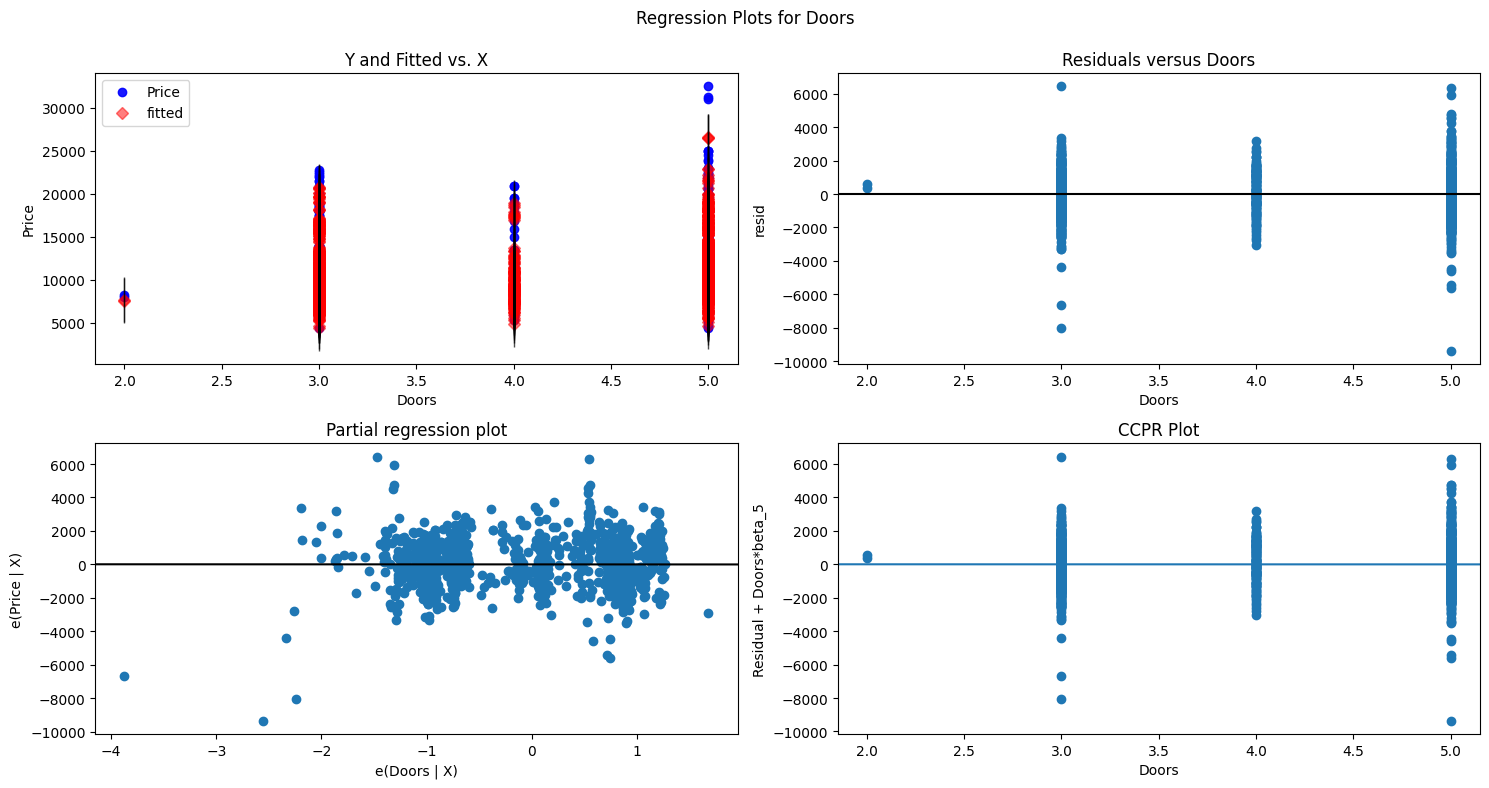

In [43]:

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

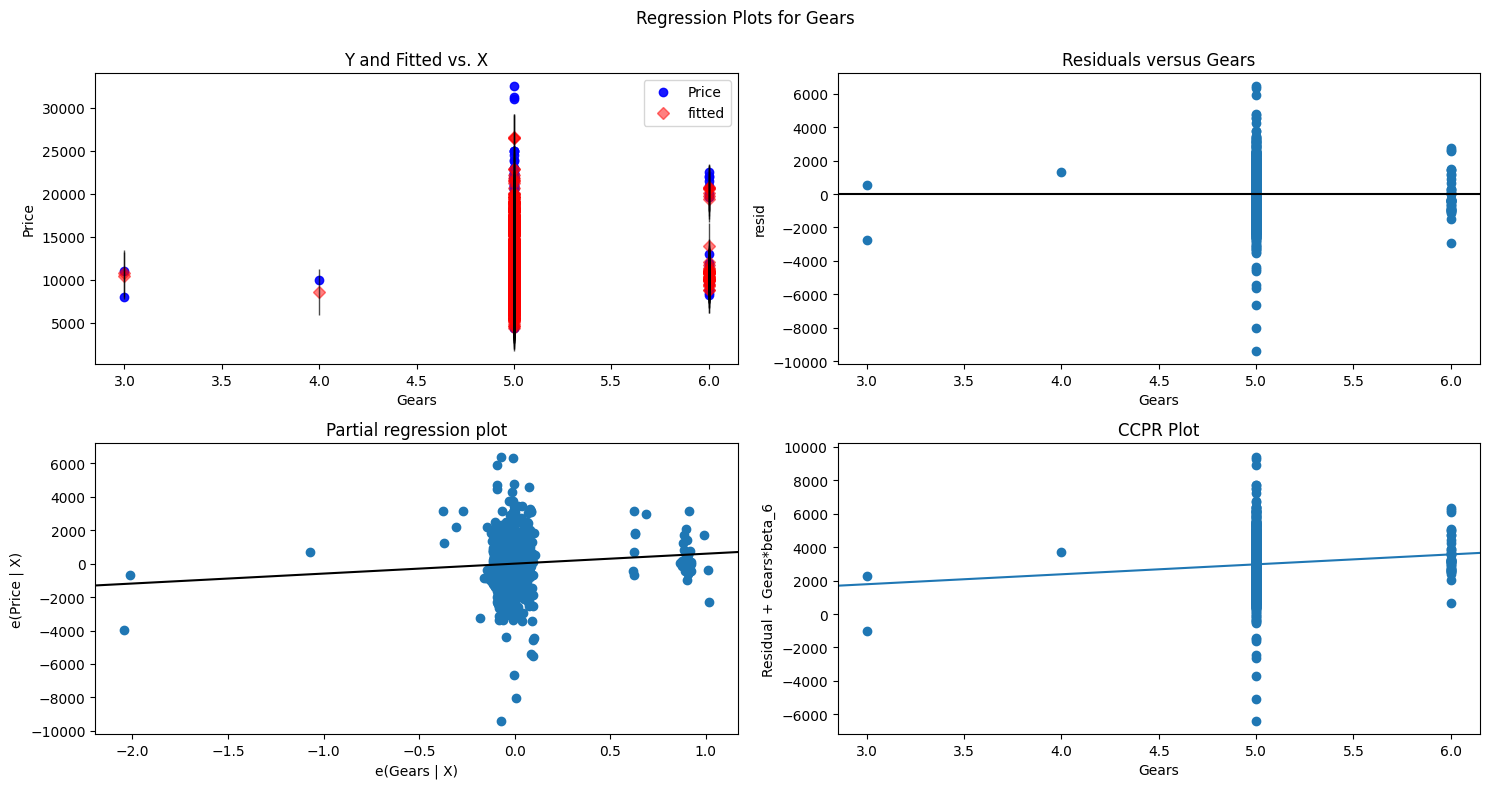

In [44]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

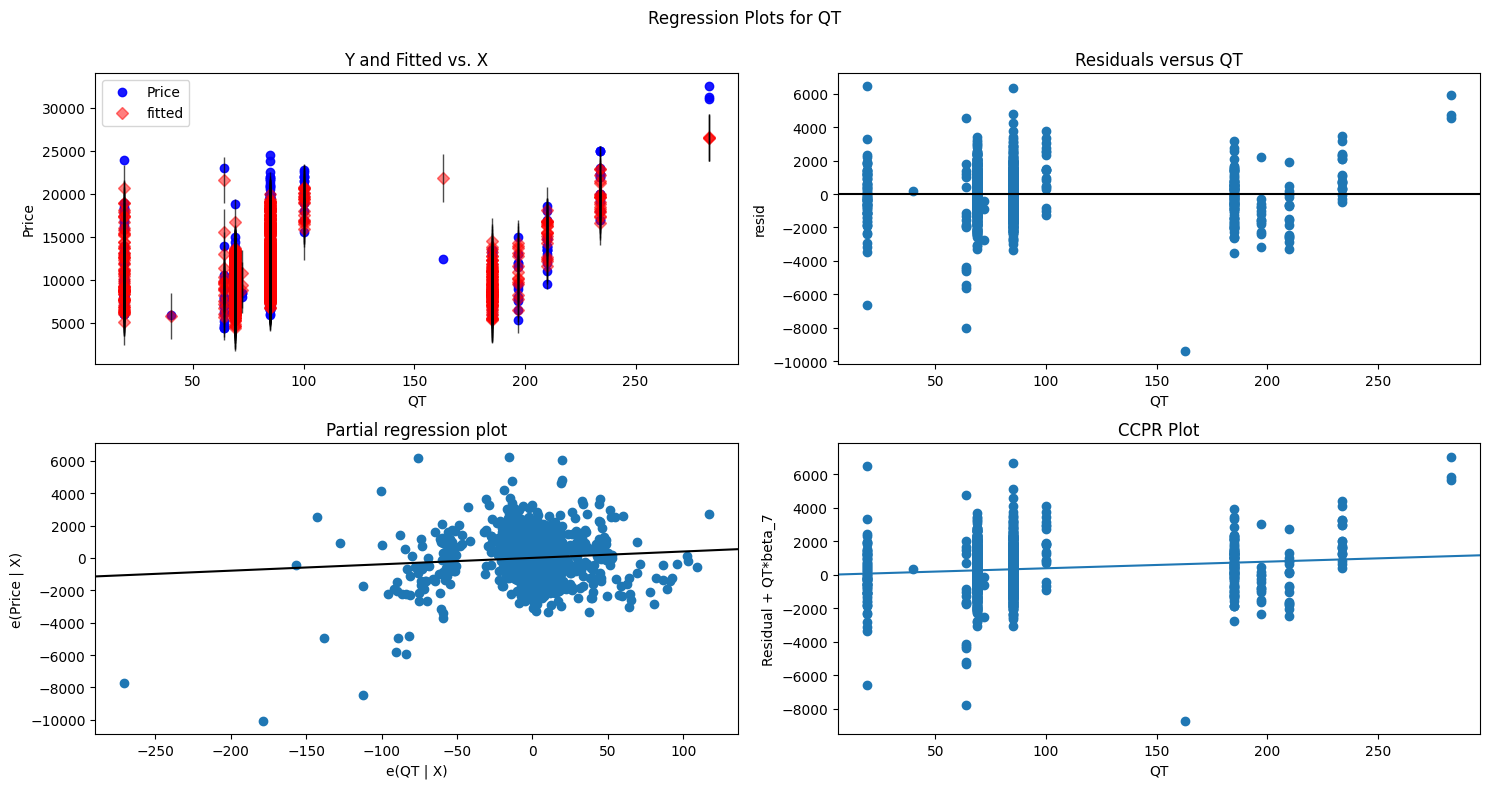

In [45]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "QT", fig=fig)
plt.show()

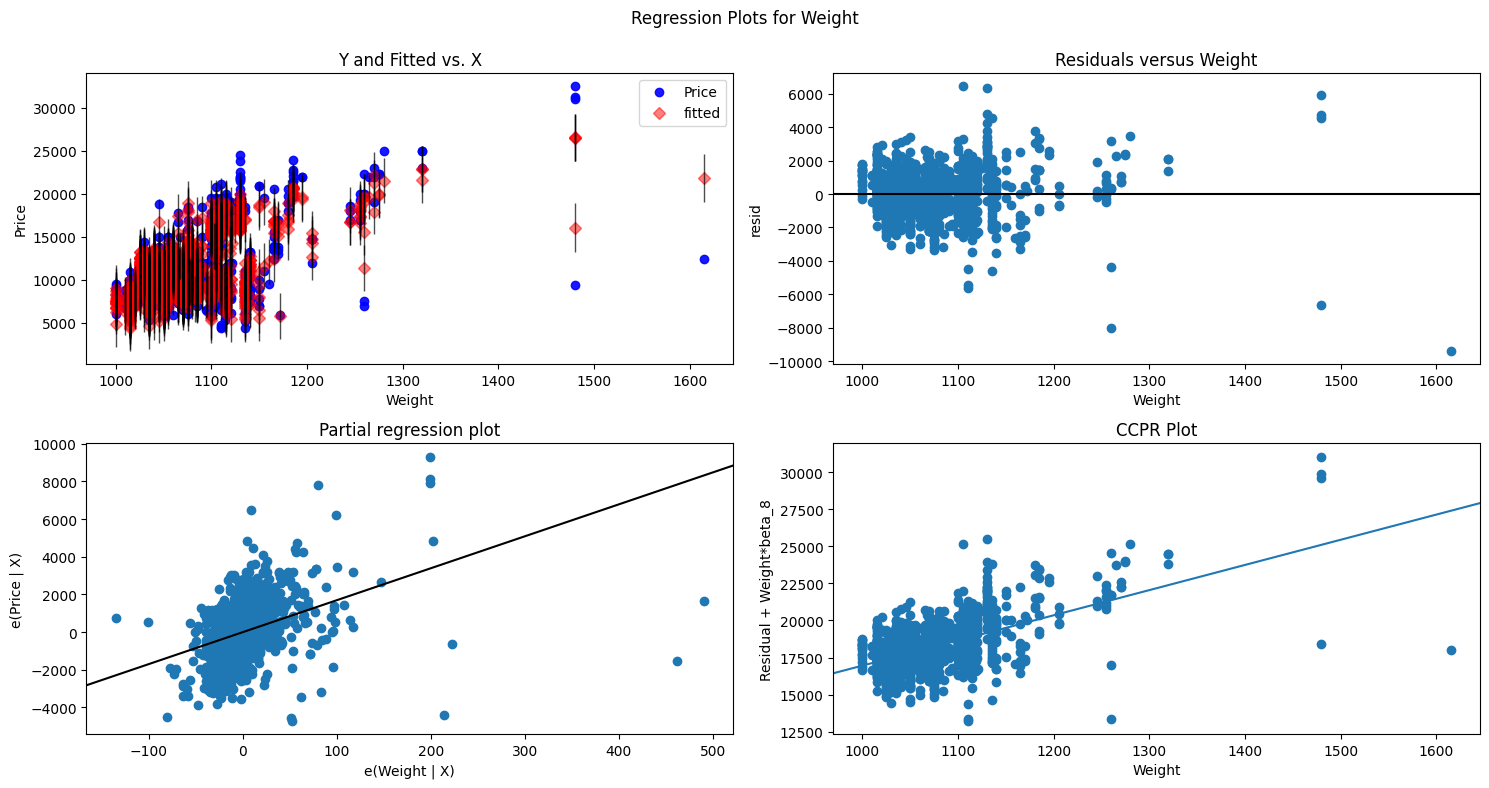

In [46]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

In [47]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

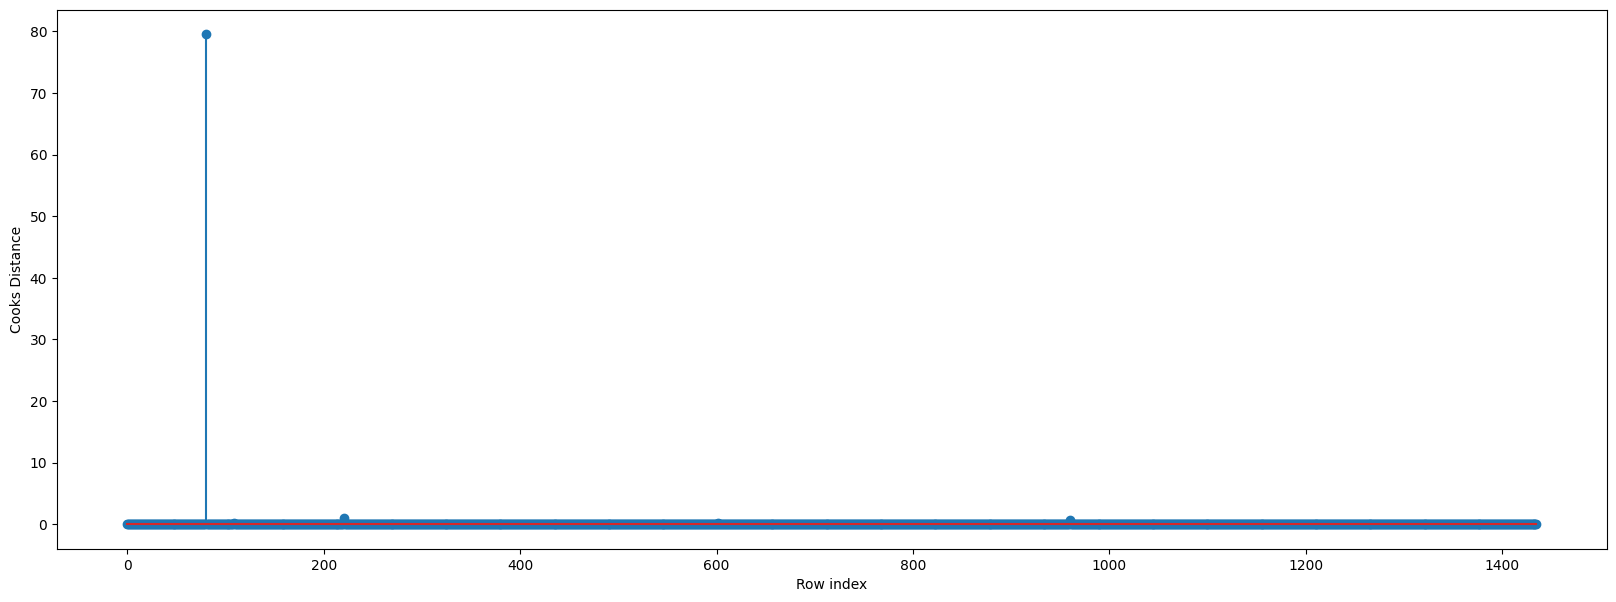

In [49]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars_4)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [50]:
(np.argmax(c),np.max(c))

(80, 79.52010624141815)

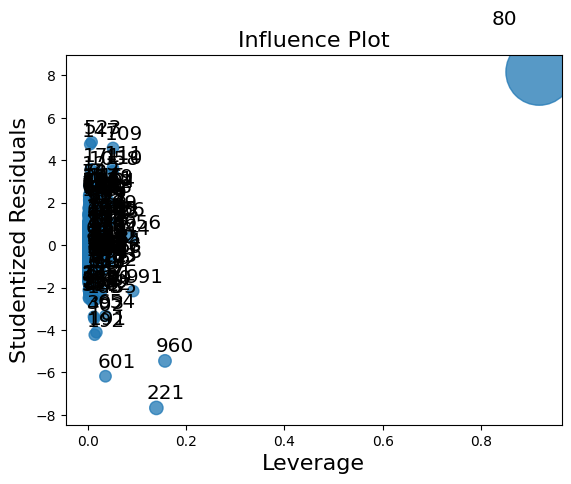

In [51]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [52]:
k = cars_4.shape[1]
n = cars_4.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [54]:
cars_4[cars_4.index.isin([80])]

,Id,Price,Age,Mfg_Month,KM,Fuel_Type,HP,Met_Color,Color,Automatic,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
80,81,18950,25,8,20019,Petrol,110,1,Blue,1,...,1,1,1,0,0,0,0,0,0,0


In [55]:
cars_4.head()

,Id,Price,Age,Mfg_Month,KM,Fuel_Type,HP,Met_Color,Color,Automatic,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,13500,23,10,46986,Diesel,90,1,Blue,0,...,1,1,1,0,0,0,1,0,0,0
1,2,13750,23,10,72937,Diesel,90,1,Silver,0,...,1,0,1,0,0,0,1,0,0,0
2,3,13950,24,9,41711,Diesel,90,1,Blue,0,...,0,0,1,0,0,0,1,0,0,0
3,4,14950,26,7,48000,Diesel,90,0,Black,0,...,0,0,1,0,0,0,1,0,0,0
4,5,13750,30,3,38500,Diesel,90,0,Black,0,...,1,1,1,0,1,0,1,0,0,0


In [56]:
cars_new=cars_4.copy()

In [57]:
cars_new


,Id,Price,Age,Mfg_Month,KM,Fuel_Type,HP,Met_Color,Color,Automatic,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,13500,23,10,46986,Diesel,90,1,Blue,0,...,1,1,1,0,0,0,1,0,0,0
1,2,13750,23,10,72937,Diesel,90,1,Silver,0,...,1,0,1,0,0,0,1,0,0,0
2,3,13950,24,9,41711,Diesel,90,1,Blue,0,...,0,0,1,0,0,0,1,0,0,0
3,4,14950,26,7,48000,Diesel,90,0,Black,0,...,0,0,1,0,0,0,1,0,0,0
4,5,13750,30,3,38500,Diesel,90,0,Black,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,7500,69,12,20544,Petrol,86,1,Blue,0,...,1,1,1,0,1,1,1,0,0,0
1432,1439,10845,72,9,19000,Petrol,86,0,Grey,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,8500,71,10,17016,Petrol,86,0,Blue,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,7250,70,11,16916,Petrol,86,1,Grey,0,...,0,0,0,0,0,0,1,0,0,0


In [58]:
cars_5=cars_new.drop(cars_new.index[[80]],axis=0).reset_index()

In [60]:
cars_5=cars_5.drop(['index'],axis=1)

In [61]:
cars_5

,Id,Price,Age,Mfg_Month,KM,Fuel_Type,HP,Met_Color,Color,Automatic,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,13500,23,10,46986,Diesel,90,1,Blue,0,...,1,1,1,0,0,0,1,0,0,0
1,2,13750,23,10,72937,Diesel,90,1,Silver,0,...,1,0,1,0,0,0,1,0,0,0
2,3,13950,24,9,41711,Diesel,90,1,Blue,0,...,0,0,1,0,0,0,1,0,0,0
3,4,14950,26,7,48000,Diesel,90,0,Black,0,...,0,0,1,0,0,0,1,0,0,0
4,5,13750,30,3,38500,Diesel,90,0,Black,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1438,7500,69,12,20544,Petrol,86,1,Blue,0,...,1,1,1,0,1,1,1,0,0,0
1431,1439,10845,72,9,19000,Petrol,86,0,Grey,0,...,0,0,1,0,0,1,1,0,0,0
1432,1440,8500,71,10,17016,Petrol,86,0,Blue,0,...,0,0,1,0,0,0,1,0,0,0
1433,1441,7250,70,11,16916,Petrol,86,1,Grey,0,...,0,0,0,0,0,0,1,0,0,0


In [62]:
final_ml_D= smf.ols('Price~Age+KM+HP+Doors+Gears+QT+Weight',data = cars_5).fit()

In [63]:
(final_ml_D.rsquared,final_ml_D.aic)

(0.8631959819380925, 24751.649416173997)

In [64]:
final_ml_C= smf.ols('Price~Age+KM+HP+cc+Gears+QT+Weight',data = cars_5).fit()

In [65]:
(final_ml_C.rsquared,final_ml_C.aic)

(0.8693349475698542, 24685.765438793034)

In [66]:

model_influence_C = final_ml_C.get_influence()
(c_C, _) = model_influence_C.cooks_distance

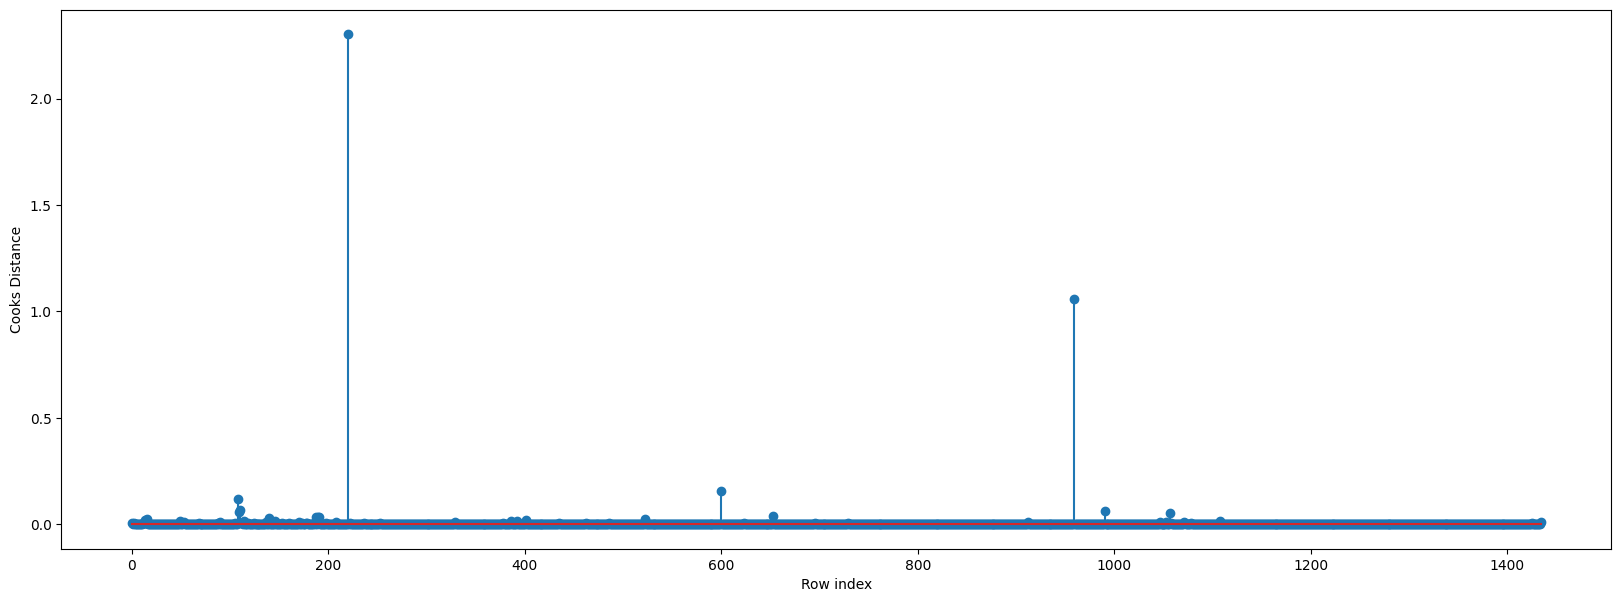

In [67]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(cars_5)),np.round(c_C,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [68]:
(np.argmax(c_C),np.max(c_C))

(220, 2.3034451664540874)

In [69]:
cars_6=cars_5.drop(cars_5.index[[219]],axis=0)

In [70]:
cars_6

,Id,Price,Age,Mfg_Month,KM,Fuel_Type,HP,Met_Color,Color,Automatic,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,13500,23,10,46986,Diesel,90,1,Blue,0,...,1,1,1,0,0,0,1,0,0,0
1,2,13750,23,10,72937,Diesel,90,1,Silver,0,...,1,0,1,0,0,0,1,0,0,0
2,3,13950,24,9,41711,Diesel,90,1,Blue,0,...,0,0,1,0,0,0,1,0,0,0
3,4,14950,26,7,48000,Diesel,90,0,Black,0,...,0,0,1,0,0,0,1,0,0,0
4,5,13750,30,3,38500,Diesel,90,0,Black,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1438,7500,69,12,20544,Petrol,86,1,Blue,0,...,1,1,1,0,1,1,1,0,0,0
1431,1439,10845,72,9,19000,Petrol,86,0,Grey,0,...,0,0,1,0,0,1,1,0,0,0
1432,1440,8500,71,10,17016,Petrol,86,0,Blue,0,...,0,0,1,0,0,0,1,0,0,0
1433,1441,7250,70,11,16916,Petrol,86,1,Grey,0,...,0,0,0,0,0,0,1,0,0,0


In [71]:
cars_7=cars_6.reset_index()

In [72]:
cars_8=cars_7.drop(['index'],axis=1)



In [73]:
cars_8

,Id,Price,Age,Mfg_Month,KM,Fuel_Type,HP,Met_Color,Color,Automatic,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,13500,23,10,46986,Diesel,90,1,Blue,0,...,1,1,1,0,0,0,1,0,0,0
1,2,13750,23,10,72937,Diesel,90,1,Silver,0,...,1,0,1,0,0,0,1,0,0,0
2,3,13950,24,9,41711,Diesel,90,1,Blue,0,...,0,0,1,0,0,0,1,0,0,0
3,4,14950,26,7,48000,Diesel,90,0,Black,0,...,0,0,1,0,0,0,1,0,0,0
4,5,13750,30,3,38500,Diesel,90,0,Black,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1438,7500,69,12,20544,Petrol,86,1,Blue,0,...,1,1,1,0,1,1,1,0,0,0
1430,1439,10845,72,9,19000,Petrol,86,0,Grey,0,...,0,0,1,0,0,1,1,0,0,0
1431,1440,8500,71,10,17016,Petrol,86,0,Blue,0,...,0,0,1,0,0,0,1,0,0,0
1432,1441,7250,70,11,16916,Petrol,86,1,Grey,0,...,0,0,0,0,0,0,1,0,0,0


In [74]:
final_ml_C= smf.ols('Price~Age+KM+HP+cc+Gears+QT+Weight',data = cars_8).fit()

In [75]:
model_influence_C = final_ml_C.get_influence()
(c_C, _) = model_influence_C.cooks_distance

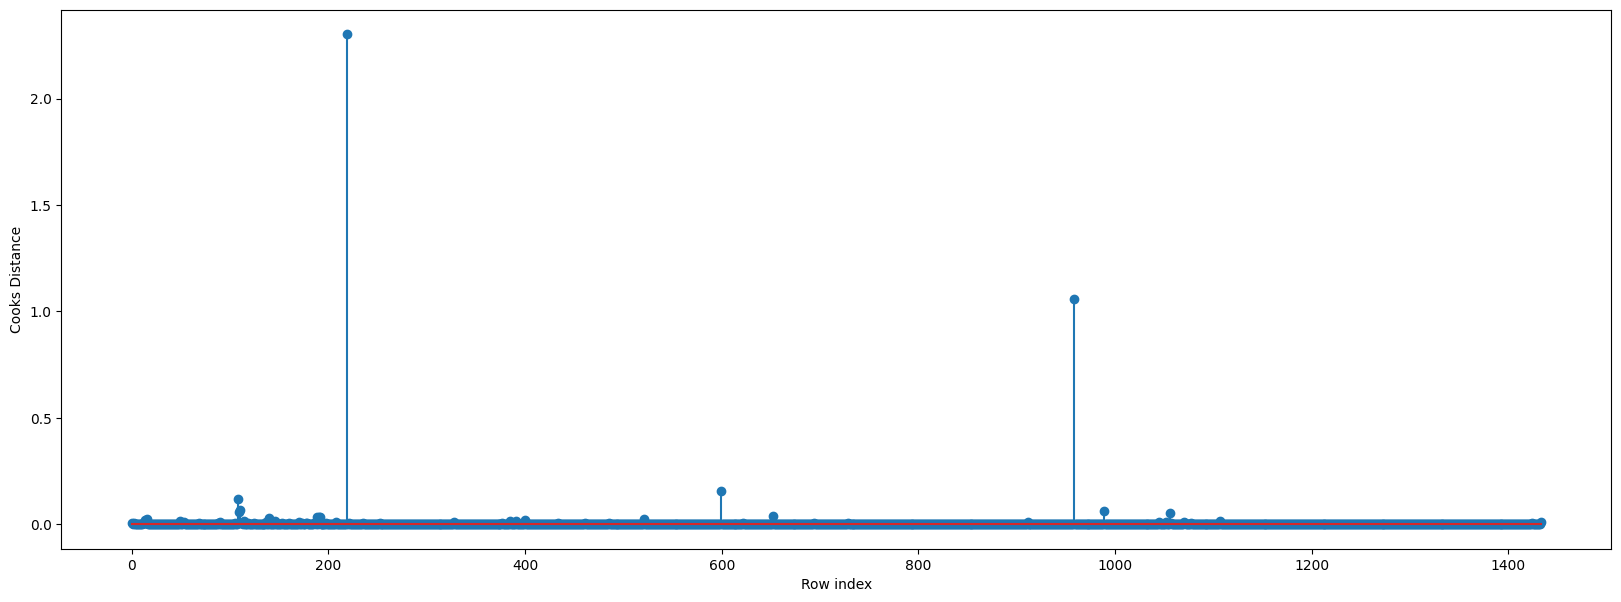

In [76]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(cars_8)),np.round(c_C,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');


In [77]:
(np.argmax(c_C),np.max(c_C))

(219, 2.3015938795437685)

In [78]:
cars_9=cars_8.drop(cars_5.index[[957]],axis=0)

In [79]:
cars_10=cars_9.reset_index()

In [80]:
cars_11=cars_10.drop(['index'],axis=1)

In [81]:
cars_11

,Id,Price,Age,Mfg_Month,KM,Fuel_Type,HP,Met_Color,Color,Automatic,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,13500,23,10,46986,Diesel,90,1,Blue,0,...,1,1,1,0,0,0,1,0,0,0
1,2,13750,23,10,72937,Diesel,90,1,Silver,0,...,1,0,1,0,0,0,1,0,0,0
2,3,13950,24,9,41711,Diesel,90,1,Blue,0,...,0,0,1,0,0,0,1,0,0,0
3,4,14950,26,7,48000,Diesel,90,0,Black,0,...,0,0,1,0,0,0,1,0,0,0
4,5,13750,30,3,38500,Diesel,90,0,Black,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1438,7500,69,12,20544,Petrol,86,1,Blue,0,...,1,1,1,0,1,1,1,0,0,0
1429,1439,10845,72,9,19000,Petrol,86,0,Grey,0,...,0,0,1,0,0,1,1,0,0,0
1430,1440,8500,71,10,17016,Petrol,86,0,Blue,0,...,0,0,1,0,0,0,1,0,0,0
1431,1441,7250,70,11,16916,Petrol,86,1,Grey,0,...,0,0,0,0,0,0,1,0,0,0


In [82]:
final_ml_C= smf.ols('Price~Age+KM+HP+cc+Gears+QT+Weight',data = cars_11).fit()

In [83]:
model_influence_C = final_ml_C.get_influence()
(c_C, _) = model_influence_C.cooks_distance

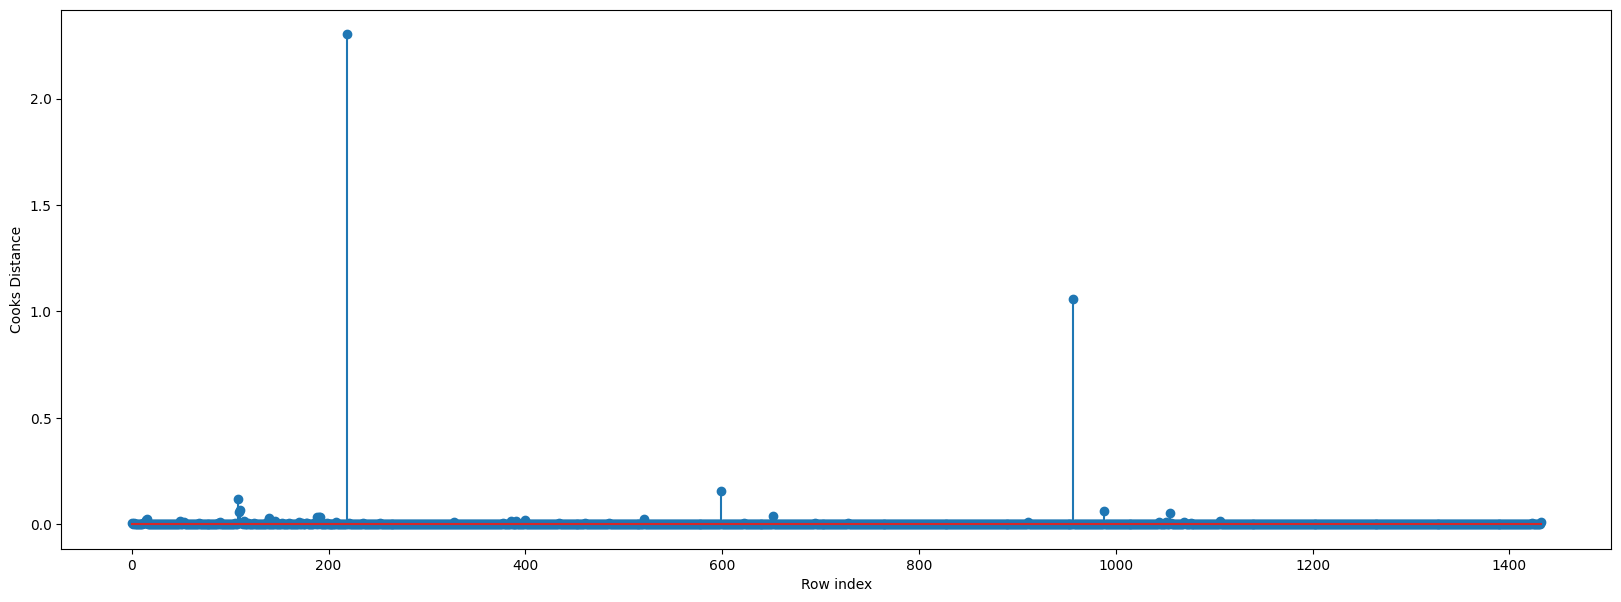

In [85]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(cars_11)),np.round(c_C,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [86]:
final_ml_C= smf.ols('Price~Age+KM+HP+cc+Gears+QT+Weight',data = cars_11).fit()

In [87]:
(final_ml_C.rsquared,final_ml_C.aic)

(0.8694701727955125, 24651.527782949935)

In [88]:
cars_11.head()

,Id,Price,Age,Mfg_Month,KM,Fuel_Type,HP,Met_Color,Color,Automatic,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,13500,23,10,46986,Diesel,90,1,Blue,0,...,1,1,1,0,0,0,1,0,0,0
1,2,13750,23,10,72937,Diesel,90,1,Silver,0,...,1,0,1,0,0,0,1,0,0,0
2,3,13950,24,9,41711,Diesel,90,1,Blue,0,...,0,0,1,0,0,0,1,0,0,0
3,4,14950,26,7,48000,Diesel,90,0,Black,0,...,0,0,1,0,0,0,1,0,0,0
4,5,13750,30,3,38500,Diesel,90,0,Black,0,...,1,1,1,0,1,0,1,0,0,0


In [89]:
new_data=pd.DataFrame({'Age':23,"KM":72937,"HP":90,"cc":2000,"Doors":3,"Gears":5,"QT":210,"Weight":1165},index=[1])


In [90]:
final_ml_C.predict(new_data)

1    16033.302566
dtype: float64

In [91]:
pred_y = final_ml_C.predict(cars_new)

In [92]:

pred_y

0       16498.202697
1       16033.302566
2       16472.272000
3       16118.747730
4       15906.972366
            ...     
1431     8953.287740
1432     8420.146071
1433     8576.118387
1434     8698.339716
1435     9989.823684
Length: 1436, dtype: float64